##Libraries and Cleaning the Data
Classifying Sentiment into +ve , -ve and neutral

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [2]:
from transformers import pipeline

In [3]:
file_path = '/content/drive/MyDrive/ML Projects/Reviews Dataset/flipkart.csv'
encoding_type = 'utf-8'
df = pd.read_csv(file_path,encoding=encoding_type)
df.head()

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [4]:
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

In [5]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

df["Review"] = df["Review"].apply(clean)
df["Sentiment_Simplified"] = df["Rating"].apply(lambda x: 'POSITIVE' if x >= 4 else ('NEUTRAL' if x == 3 else 'NEGATIVE'))
df.head()

,Unnamed: 0,Product_name,Review,Rating,Sentiment_Simplified
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,best great performancei got around backup bi...,5,POSITIVE
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,good perfom,5,POSITIVE
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,great perform usual also game laptop issu batt...,5,POSITIVE
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,wife happi best product 👌🏻😘,5,POSITIVE
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,light weight laptop new amaz featur batteri li...,5,POSITIVE


##Plots and Visulaizing the Data

In [6]:
import plotly.express as px

In [7]:
ratings = df["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

In [10]:
figure = px.pie(df,
             values=quantity,
             names=numbers,hole = 0.5)
figure.show()

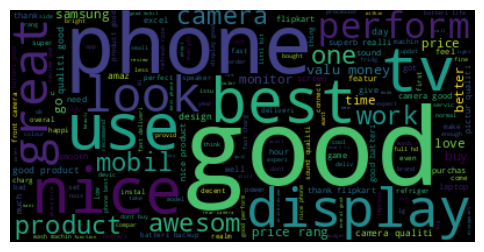

In [11]:
text = " ".join(i for i in df.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(text)
plt.figure(figsize=(6,4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##Sentiment Analysis with Pre-trained Transformers

Hugging Face

In [12]:
sentiment = pipeline("sentiment-analysis")

df['Sentiment'] = df['Review'].apply(lambda x: sentiment(x)[0]['label'])

matching_sentiments = (df['Sentiment'] == df['Sentiment_Simplified']).sum()
differing_sentiments = (df['Sentiment'] != df['Sentiment_Simplified']).sum()

print("Number of matching sentiments:", matching_sentiments)
print("Number of differing sentiments:", differing_sentiments)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Number of matching sentiments: 1433
Number of differing sentiments: 871


Vader

In [13]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiments = SentimentIntensityAnalyzer()

df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Review"]]

def get_sentiment_label(row):
    if row['Positive'] > row['Negative'] and row['Positive'] > row['Neutral']:
        return 'POSITIVE'
    elif row['Negative'] > row['Positive'] and row['Negative'] > row['Neutral']:
        return 'NEGATIVE'
    else:
        return 'NEUTRAL'

df['Sentiment_Label'] = df.apply(get_sentiment_label, axis=1)
df.head()


,Unnamed: 0,Product_name,Review,Rating,Sentiment_Simplified,Sentiment,Positive,Negative,Neutral,Sentiment_Label
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,best great performancei got around backup bi...,5,POSITIVE,POSITIVE,0.395,0.101,0.504,NEUTRAL
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,good perfom,5,POSITIVE,POSITIVE,0.744,0.000,0.256,POSITIVE
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,great perform usual also game laptop issu batt...,5,POSITIVE,POSITIVE,0.277,0.000,0.723,NEUTRAL
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,wife happi best product 👌🏻😘,5,POSITIVE,POSITIVE,0.512,0.000,0.488,POSITIVE
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,light weight laptop new amaz featur batteri li...,5,POSITIVE,NEGATIVE,0.000,0.000,1.000,NEUTRAL


##Using Algorithms

Logistic Regression

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Vectorizing the text data
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['Review']).toarray()
y = df['Sentiment_Simplified']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Accuracy
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr}")

# Classification Report
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.911062906724512
              precision    recall  f1-score   support

    NEGATIVE       0.92      0.53      0.68        43
     NEUTRAL       1.00      0.17      0.29        24
    POSITIVE       0.91      1.00      0.95       394

    accuracy                           0.91       461
   macro avg       0.94      0.57      0.64       461
weighted avg       0.92      0.91      0.89       461



In [15]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier

Support Vector Machine

In [16]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"Support Vector Machine Accuracy: {accuracy_svc}")
print(classification_report(y_test, y_pred_svc))

Support Vector Machine Accuracy: 0.928416485900217
              precision    recall  f1-score   support

    NEGATIVE       0.93      0.65      0.77        43
     NEUTRAL       1.00      0.29      0.45        24
    POSITIVE       0.93      1.00      0.96       394

    accuracy                           0.93       461
   macro avg       0.95      0.65      0.73       461
weighted avg       0.93      0.93      0.92       461



Random Forest

In [17]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9609544468546638
              precision    recall  f1-score   support

    NEGATIVE       1.00      0.88      0.94        43
     NEUTRAL       1.00      0.46      0.63        24
    POSITIVE       0.96      1.00      0.98       394

    accuracy                           0.96       461
   macro avg       0.99      0.78      0.85       461
weighted avg       0.96      0.96      0.96       461




Naive Bayes

In [18]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.8655097613882863
              precision    recall  f1-score   support

    NEGATIVE       1.00      0.12      0.21        43
     NEUTRAL       0.00      0.00      0.00        24
    POSITIVE       0.86      1.00      0.93       394

    accuracy                           0.87       461
   macro avg       0.62      0.37      0.38       461
weighted avg       0.83      0.87      0.81       461



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Gradient Boosting

In [19]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb}")
print(classification_report(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.9327548806941431
              precision    recall  f1-score   support

    NEGATIVE       0.94      0.72      0.82        43
     NEUTRAL       0.88      0.29      0.44        24
    POSITIVE       0.93      0.99      0.96       394

    accuracy                           0.93       461
   macro avg       0.92      0.67      0.74       461
weighted avg       0.93      0.93      0.92       461



#Results

In [20]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes', 'Gradient Boosting'],
    'Accuracy': [accuracy_lr, accuracy_svc, accuracy_rf, accuracy_nb, accuracy_gb]
})

In [21]:
print(results)

                 Model  Accuracy
0  Logistic Regression  0.911063
1                  SVM  0.928416
2        Random Forest  0.960954
3          Naive Bayes  0.865510
4    Gradient Boosting  0.932755


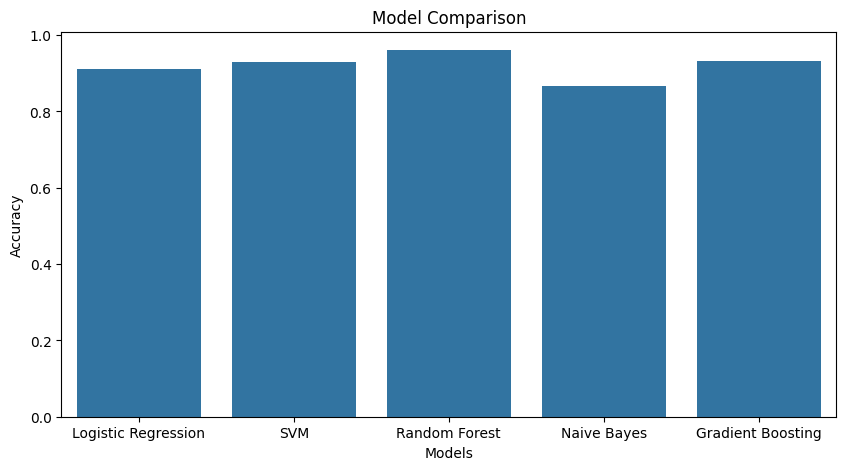

In [22]:
# Plotting Results
plt.figure(figsize=(10,5))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()